For this chapter, you will have to do the following:
• Import the Data Set.

• Firstly, we will explore how the feature scale influences the algorithm’s performance. Train an SVM model on 4 versions of the Data
Set:
- Initial one.
- The one passed through the StandardScaler.
- The one passed through the MinMaxScaler.
- The one passed through the MaxAbsScaler.
Create the following table in pandas and compare the results. Comment
them:
Initial standard scaler min max scaler max abs scaler
• Usually, SVMs use some Kernel to move the data to another space
where linear planes separate the classes. In this task, you will have to
explore how different kernels influence the decision boundary. Create the
plots of decision boundary for the following kernels:
- linear
- poly
- rbf
- sigmoid
Plot them all together in a combined plot, compare them, and express
some conclusions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("heart.csv")
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
def train_evaluate_svm(X_train, X_test, y_train, y_test):
    model = SVC()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

# Initial
initial_acc = train_evaluate_svm(X_train, X_test, y_train, y_test)

# StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)
std_acc = train_evaluate_svm(X_train_std, X_test_std, y_train, y_test)

# MinMaxScaler
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)
mm_acc = train_evaluate_svm(X_train_mm, X_test_mm, y_train, y_test)

# MaxAbsScaler
scaler_ma = MaxAbsScaler()
X_train_ma = scaler_ma.fit_transform(X_train)
X_test_ma = scaler_ma.transform(X_test)
ma_acc = train_evaluate_svm(X_train_ma, X_test_ma, y_train, y_test)


StandardScaler: среднее = 0, стандартное отклонение = 1. Подходит для SVM, особенно с RBF.

MinMaxScaler: приводит значения в диапазон [0, 1].

MaxAbsScaler: нормирует значения по модулю к максимуму. Удобен для разреженных данных.



X = np.array([
    [0, 1],
    [0, 10],
    [0, -5]


    [[ 0. ,  0.1],
 [ 0. ,  1. ],
 [ 0. , -0.5]]

In [9]:
results = pd.DataFrame({
    'Version': ['Initial', 'Standard Scaler', 'MinMax Scaler', 'MaxAbs Scaler'],
    'Accuracy': [initial_acc, std_acc, mm_acc, ma_acc]
})

print(results)


           Version  Accuracy
0          Initial  0.704918
1  Standard Scaler  0.868852
2    MinMax Scaler  0.836066
3    MaxAbs Scaler  0.836066


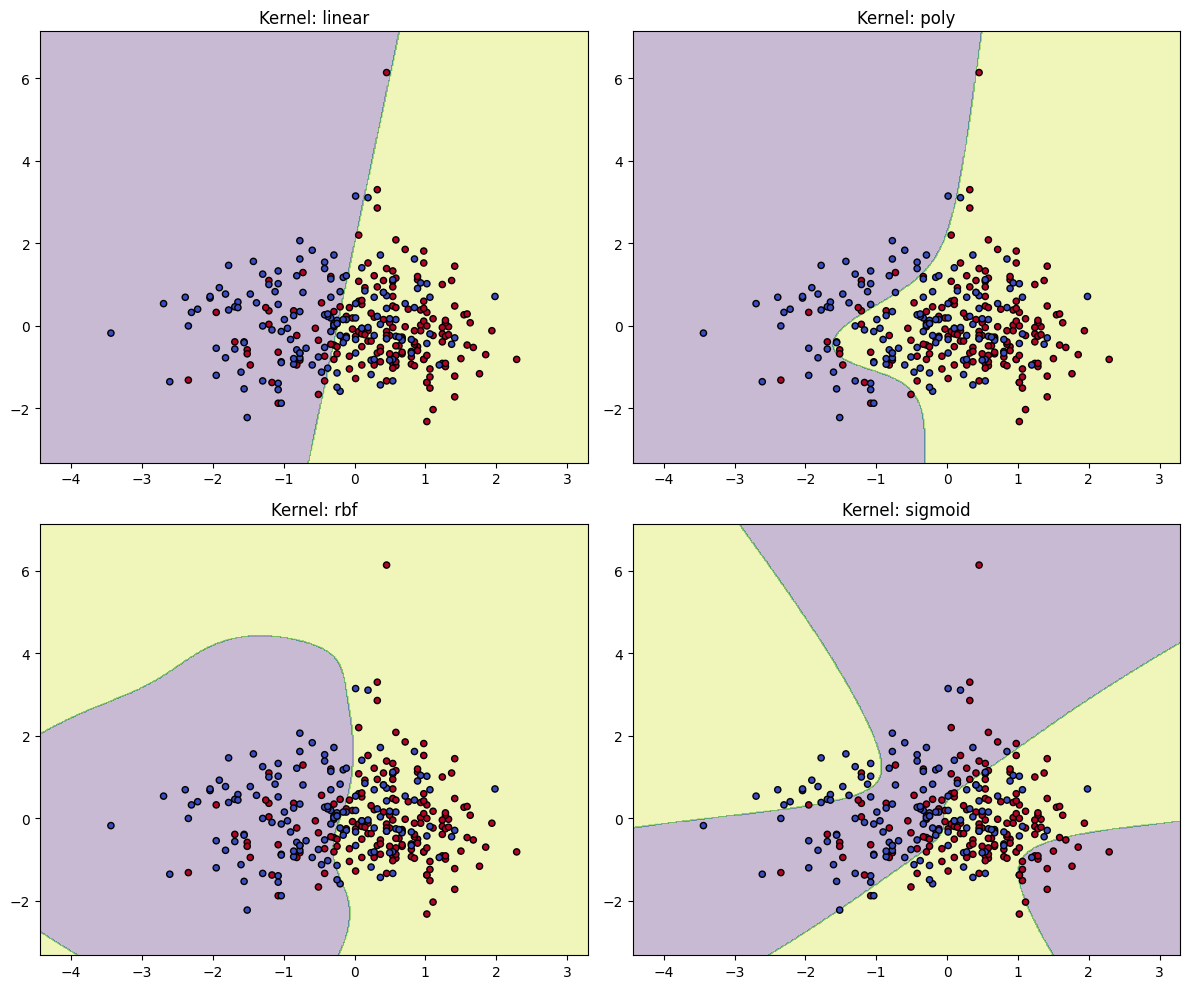

In [10]:
from sklearn.preprocessing import LabelEncoder

#только два признака
features = ['thalach', 'chol']
X_pair = df[features].values
y_pair = df['target'].values

# Масштабируем
sc = StandardScaler()
X_pair_scaled = sc.fit_transform(X_pair)

# Сетка
x_min, x_max = X_pair_scaled[:, 0].min() - 1, X_pair_scaled[:, 0].max() + 1
y_min, y_max = X_pair_scaled[:, 1].min() - 1, X_pair_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    model = SVC(kernel=kernel)
    model.fit(X_pair_scaled, y_pair)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_pair_scaled[:, 0], X_pair_scaled[:, 1], c=y_pair, s=20, cmap='coolwarm', edgecolors='k')
    ax.set_title(f'Kernel: {kernel}')

plt.tight_layout()
plt.show()


# **Вывод**

Как было и сказанно svm решает проблемы с классификационными задачами.

Без масштабирования SVM работает хуже, потому что не может правильно оценить расстояния в признаковом пространстве.

Он переводит данные в другое пространство для из раздеоения

# Что нового я вынесла

 ядро переводит данные в "более подходящую форму", чтобы их было легко разделить.

 1. linear
Ничего не переводит, просто пытается делить прямой. Быстро, просто, но слабовато.

2. poly
Поднимает данные в пространство полиномов (квадраты, кубы и т.д.). Делит "кривой" линией.

3. rbf (Gaussian/Radial Basis Function)
Самое популярное. Делает не просто кривую, а гладкую, адаптивную границу, которая обволакивает кластеры точек.

Это как если бы ты бросила капли краски на карту и каждая растекается по-своему.

4. sigmoid
Поведение похоже на нейроны. Работает нестабильно, но теоретически интересен.

Что значит "классы перепутаны"?
Это про ситуации, когда данные неразделимы линейно — не получится провести прямую, которая отделит один класс от другого. Пример из жизни: у тебя два вида цветов, но их высота и ширина лепестков перемешаны так, что цвет не предсказать по одной прямой. Они буквально перепутаны в пространстве признаков.

"Пациент болен или здоров?"

Это пример классификации а например будет у пациента рак или нет прооемы предсказания